In [ ]:
%matplotlib inline

In [ ]:
from treatment_sims_2023_02_21 import *

Splikes version  0.1.2
Plasticnet version  0.1.9
macOS-10.16-x86_64-i386-64bit


In [ ]:
base='sims/2023-04-06'

In [ ]:
rf_size=19
eta=1e-6
number_of_neurons=5
number_of_processes=4
mu_c_mat=[0,7.5]
sigma_c_mat=[0,2]
blur_mat=[0,2,4,6,8,10,12]

varnames=['rf_size',
        'eta',
        'number_of_neurons',
        'number_of_processes',
        'mu_c_mat',
        'sigma_c_mat',
        'blur_mat',
         ]

## Deficit

In [ ]:
from collections import namedtuple
params = namedtuple('params', ['count', 'eta','noise','blur','number_of_neurons','sfname','mu_c','sigma_c'])
all_params=[]
count=0
eta_count=0
noise_count=0
open_eye_noise=0.1

for mu_count,mu_c in enumerate(mu_c_mat):
    for sigma_count,sigma_c in enumerate(sigma_c_mat):
        for blur_count,blur in enumerate(blur_mat):
        
            all_params.append(params(count=count,
                         eta=eta,
                         noise=open_eye_noise,
                         blur=blur,
                         number_of_neurons=number_of_neurons,
         sfname=f'{base}/deficit {number_of_neurons} neurons {mu_c} mu_c {sigma_c} sigma_c {blur} blur.asdf',
                                mu_c=mu_c,sigma_c=sigma_c))

        count+=1
for a in all_params[:5]:
    print(a)
print("[....]")
for a in all_params[-5:]:
    print(a)



params(count=0, eta=1e-06, noise=0.1, blur=0, number_of_neurons=5, sfname='sims/2023-04-06/deficit 5 neurons 0 mu_c 0 sigma_c 0 blur.asdf', mu_c=0, sigma_c=0)
params(count=0, eta=1e-06, noise=0.1, blur=2, number_of_neurons=5, sfname='sims/2023-04-06/deficit 5 neurons 0 mu_c 0 sigma_c 2 blur.asdf', mu_c=0, sigma_c=0)
params(count=0, eta=1e-06, noise=0.1, blur=4, number_of_neurons=5, sfname='sims/2023-04-06/deficit 5 neurons 0 mu_c 0 sigma_c 4 blur.asdf', mu_c=0, sigma_c=0)
params(count=0, eta=1e-06, noise=0.1, blur=6, number_of_neurons=5, sfname='sims/2023-04-06/deficit 5 neurons 0 mu_c 0 sigma_c 6 blur.asdf', mu_c=0, sigma_c=0)
params(count=0, eta=1e-06, noise=0.1, blur=8, number_of_neurons=5, sfname='sims/2023-04-06/deficit 5 neurons 0 mu_c 0 sigma_c 8 blur.asdf', mu_c=0, sigma_c=0)
[....]
params(count=3, eta=1e-06, noise=0.1, blur=4, number_of_neurons=5, sfname='sims/2023-04-06/deficit 5 neurons 7.5 mu_c 2 sigma_c 4 blur.asdf', mu_c=7.5, sigma_c=2)
params(count=3, eta=1e-06, noise=0.

In [ ]:
RR={}
for params in tqdm(all_params):
    RR[params.sfname]=Results(params.sfname)

  0%|          | 0/28 [00:00<?, ?it/s]

In [ ]:
savevars(base+"/deficit_results.asdf",
        'all_params',
        'RR',
         *varnames
        )

Saving sims/2023-04-06/deficit_results.asdf...done.


In [ ]:
params=all_params[-1]
print(params)
sfname=params.sfname
R=RR[sfname]

params(count=3, eta=1e-06, noise=0.1, blur=12, number_of_neurons=5, sfname='sims/2023-04-06/deficit 5 neurons 7.5 mu_c 2 sigma_c 12 blur.asdf', mu_c=7.5, sigma_c=2)


sims/2023-04-06/deficit 5 neurons 7.5 mu_c 2 sigma_c 12 blur.asdf


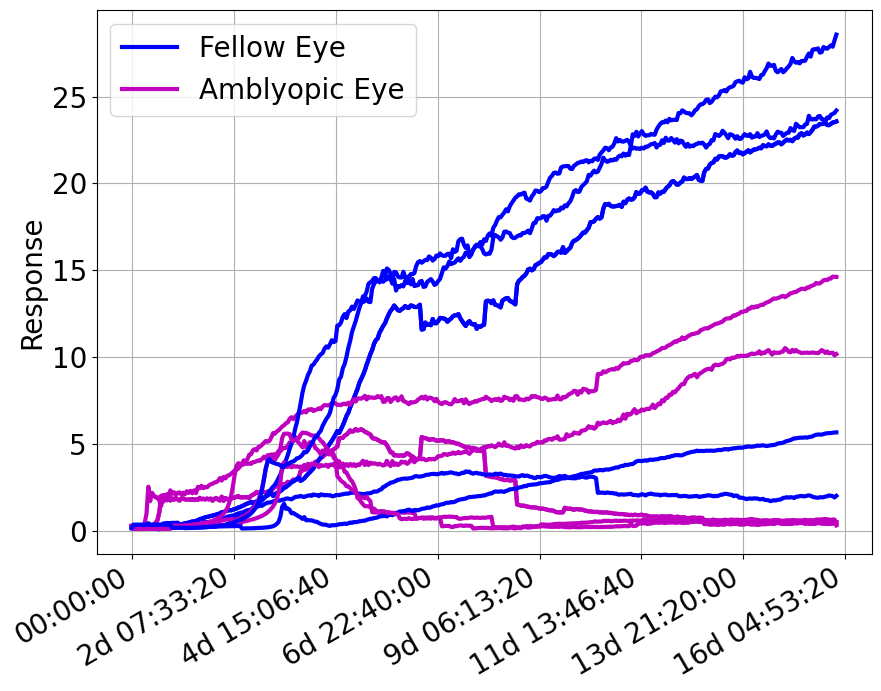

In [ ]:
plot(R.t,R.y[:,0,strong_i],'b',label='Fellow Eye')
plot(R.t,R.y[:,0,weak_i],'m',label='Amblyopic Eye')

for n in range(number_of_neurons):
    plot(R.t,R.y[:,n,0],'m')
    plot(R.t,R.y[:,n,1],'b')
    
    
ylabel('Response')
legend()
print(sfname)
reformat_time_axis()    

### Maximum response - deficit

Text(7, 40, 'Fellow')

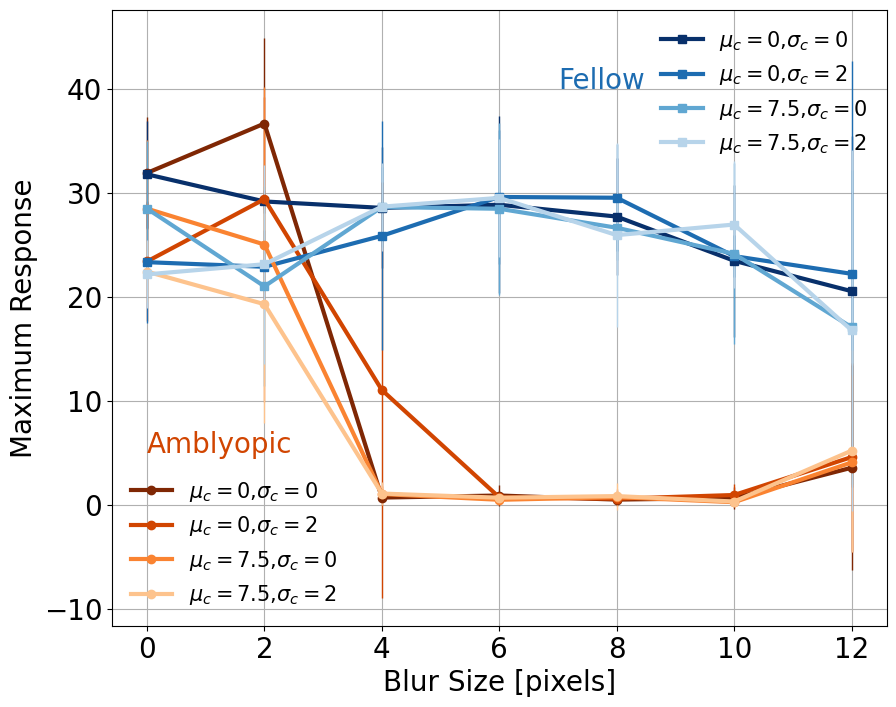

In [ ]:
n = 10

colormap=cm.tab10
color = colormap(np.linspace(0, 1,n))


v=np.flip(linspace(0.3,1,4))

color_count=0
count=0
h1=[]
h2=[]
labels=[]
for mu_count,mu_c in enumerate(mu_c_mat):
    for sigma_count,sigma_c in enumerate(sigma_c_mat):
        
        labels+=[f'$\mu_c={mu_c}$,$\sigma_c={sigma_c}$']
        
        s=Storage()
        for blur_count,blur in enumerate(blur_mat):


            params=all_params[count]
            count+=1

            R=RR[params.sfname]

            blur=params.blur
            μ1,μ2=R.μσ[0][0]
            σ1,σ2=R.μσ[1][0]

            s+=blur,μ1,μ2,σ1,σ2

        blur,μ1,μ2,σ1,σ2=s.arrays()
        h=errorbar(blur,μ1,yerr=2*σ1,marker='o',elinewidth=1,color=cm.Oranges(v[color_count]))
        h1+=[h[0]]
        h=errorbar(blur,μ2,yerr=2*σ2,marker='s',elinewidth=1,color=cm.Blues(v[color_count]))
        h2+=[h[0]]
        xlabel('Blur Size [pixels]')
        ylabel('Maximum Response')
        
        color_count+=1


# specify the lines and labels of the first legend
ax=gca()
ax.legend(h1, labels,
          loc='lower left', frameon=False,fontsize=15)

text(0,5,'Amblyopic',color=cm.Oranges(v[1]))

# # Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = Legend(ax, h2, labels,
              loc='upper right', frameon=False,fontsize=15)
ax.add_artist(leg)
text(7,40,'Fellow',color=cm.Blues(v[1]))



### ODI deficit

<matplotlib.legend.Legend>

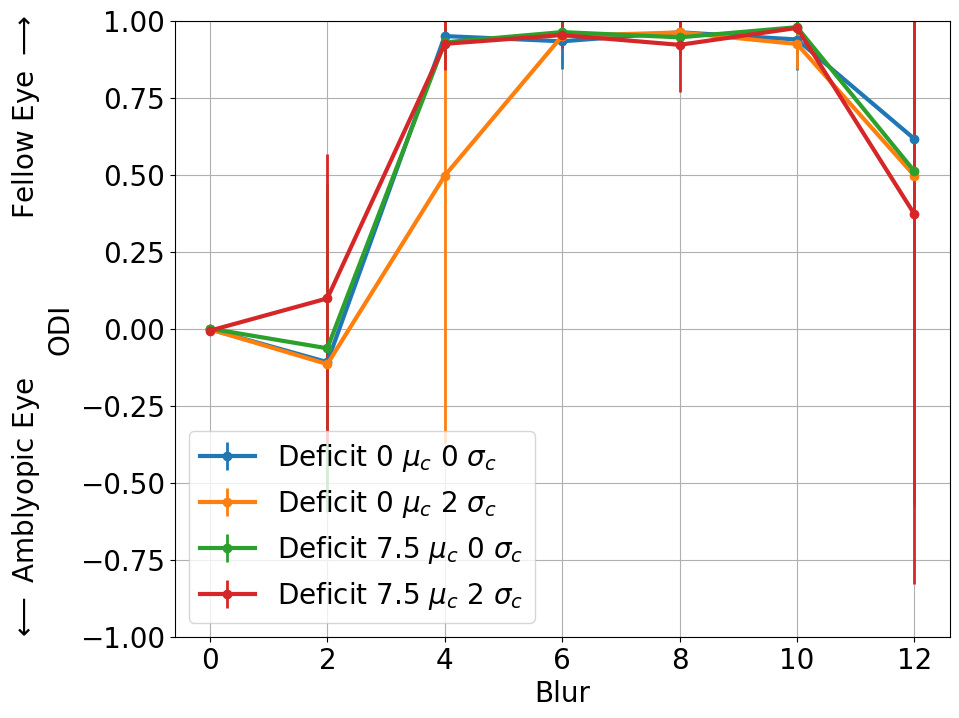

In [ ]:
import cycler
colormap=cm.viridis

n = 10

colormap=cm.tab10
color = colormap(np.linspace(0, 1,n))

count=0
v=np.flip(linspace(0.3,1,4))


color_count=0
count=0
for mu_count,mu_c in enumerate(mu_c_mat):
    for sigma_count,sigma_c in enumerate(sigma_c_mat):
        s=Storage()
        for blur_count,blur in enumerate(blur_mat):


            params=all_params[count]
            count+=1

            R=RR[params.sfname]

            blur=params.blur
            μ,σ=μσ(R.ODI[-1])
            μ0,σ0=μσ(R.ODI[0])

            s+=blur,μ,σ,μ0,σ0


        blur,μ,σ,μ0,σ0=s.arrays()
        
        errorbar(blur,μ,yerr=2*σ,marker='o',elinewidth=2,color=color[color_count],
                label=f'Deficit {mu_c} $\mu_c$ {sigma_c} $\sigma_c$')    
        color_count+=1

xlabel('Blur')
ylabel(r'$\longleftarrow$ Amblyopic Eye                  Fellow Eye $\longrightarrow$'+"\nODI")
ylim([-1,1])
legend()


## Fix

In [ ]:
from collections import namedtuple

noise_mat=linspace(0,1,11)
blur=6


varnames=['rf_size',
        'eta',
        'number_of_neurons',
        'number_of_processes',
        'mu_c_mat',
        'sigma_c_mat',
        'blur_mat',
         ]


params = namedtuple('params', ['count', 'eta','noise','blur','number_of_neurons','sfname','mu_c','sigma_c'])
all_params=[]
count=0


for mu_count,mu_c in enumerate(mu_c_mat):
    for sigma_count,sigma_c in enumerate(sigma_c_mat):
        for blur_count,blur in enumerate(blur_mat):

            for noise_count,open_eye_noise in enumerate(noise_mat):
                all_params.append(params(count=count,
                             eta=eta,
                             noise=open_eye_noise,
                                 blur=blur,
                             number_of_neurons=number_of_neurons,
                 sfname=f'{base}/optical_fix {number_of_neurons} neurons {mu_c} mu_c {sigma_c} sigma_c {blur} blur {open_eye_noise:.1f} noise.asdf',
                            mu_c=mu_c,sigma_c=sigma_c))

                count+=1

for a in all_params[:5]:
    print(a)
print("[....]")
for a in all_params[-5:]:
    print(a)



params(count=0, eta=1e-06, noise=0.0, blur=0, number_of_neurons=5, sfname='sims/2023-04-06/optical_fix 5 neurons 0 mu_c 0 sigma_c 0 blur 0.0 noise.asdf', mu_c=0, sigma_c=0)
params(count=1, eta=1e-06, noise=0.1, blur=0, number_of_neurons=5, sfname='sims/2023-04-06/optical_fix 5 neurons 0 mu_c 0 sigma_c 0 blur 0.1 noise.asdf', mu_c=0, sigma_c=0)
params(count=2, eta=1e-06, noise=0.2, blur=0, number_of_neurons=5, sfname='sims/2023-04-06/optical_fix 5 neurons 0 mu_c 0 sigma_c 0 blur 0.2 noise.asdf', mu_c=0, sigma_c=0)
params(count=3, eta=1e-06, noise=0.30000000000000004, blur=0, number_of_neurons=5, sfname='sims/2023-04-06/optical_fix 5 neurons 0 mu_c 0 sigma_c 0 blur 0.3 noise.asdf', mu_c=0, sigma_c=0)
params(count=4, eta=1e-06, noise=0.4, blur=0, number_of_neurons=5, sfname='sims/2023-04-06/optical_fix 5 neurons 0 mu_c 0 sigma_c 0 blur 0.4 noise.asdf', mu_c=0, sigma_c=0)
[....]
params(count=303, eta=1e-06, noise=0.6000000000000001, blur=12, number_of_neurons=5, sfname='sims/2023-04-06/opt

In [ ]:
RR={}
for params in tqdm(all_params):
    RR[params.sfname]=Results(params.sfname)

  0%|          | 0/308 [00:00<?, ?it/s]

In [ ]:
varnames=['rf_size',
        'eta',
        'number_of_neurons',
        'number_of_processes',
        'mu_c_mat',
        'sigma_c_mat',
        'blur_mat',
          'noise_mat',
         ]

savevars(base+"/fix_results.asdf",
        'all_params',
        'RR',
         *varnames
        )

Saving sims/2023-04-06/fix_results.asdf...done.


Text(0.5, 1.0, 'noise')

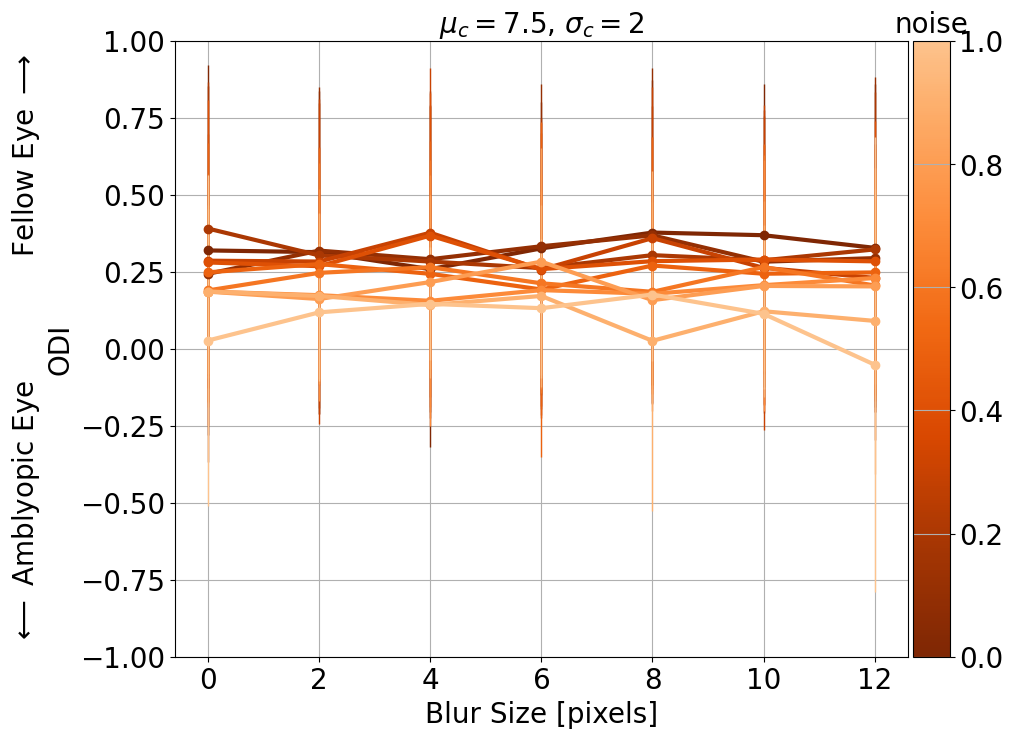

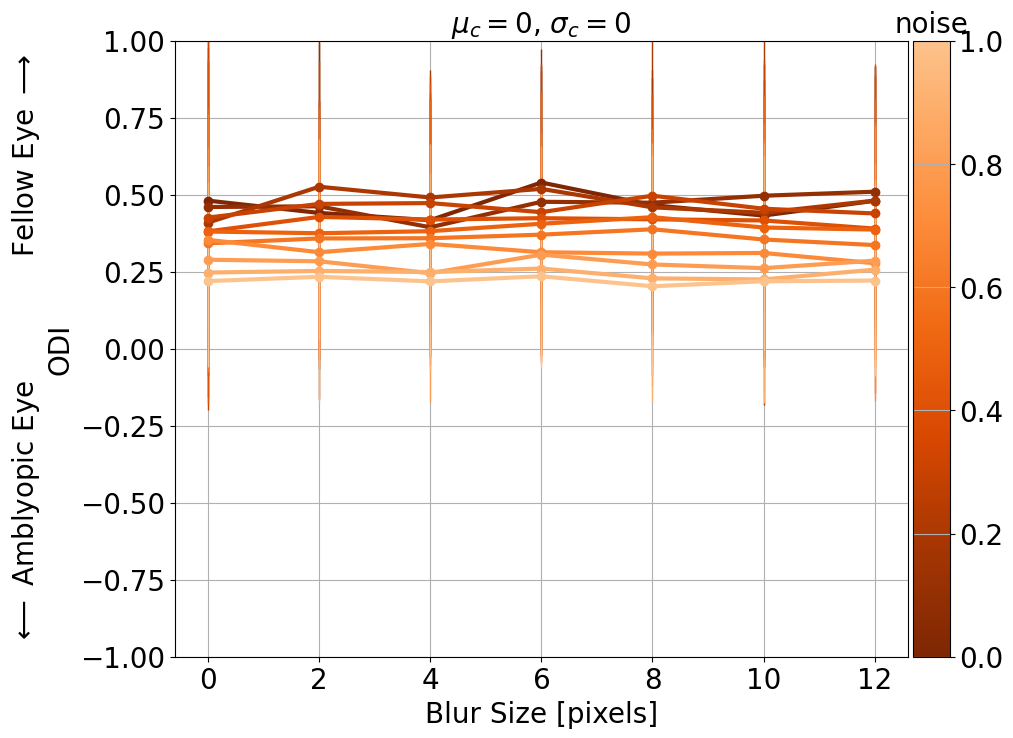

In [ ]:
figure()
μ_c=7.5
σ_c=2

v=np.flip(linspace(0.3,1,len(noise_mat)))
for noise_count,open_eye_noise in enumerate(noise_mat):
    s=Storage()
    
    for blur_count,blur in enumerate(blur_mat):

        p=[params for params in all_params if 
             (params.noise==open_eye_noise) & 
             (params.blur==blur) & 
             (params.mu_c==μ_c) & 
             (params.sigma_c==σ_c) 
            ]
        assert len(p)==1
        params=p[0]
        
        R=RR[params.sfname]
        
        blur=params.blur
        μ,σ=μσ(R.ODI[-1])

        s+=blur,μ,σ

    blur,μ,σ=s.arrays()
    errorbar(blur,μ,yerr=2*σ,marker='o',elinewidth=1,color=cm.Oranges(v[noise_count]))    
    xlabel('Blur Size [pixels]')
    ylabel(r'$\longleftarrow$ Amblyopic Eye              Fellow Eye $\longrightarrow$'+"\nODI")
    ylim([-1,1])
    title(f'$\mu_c={μ_c}$, $\sigma_c={σ_c}$')
        
divider = make_axes_locatable(plt.gca())
ax_cb2 = divider.new_horizontal(size="5%", pad=0.05)    
ax_cb2.grid(False)
cb2 = mpl.colorbar.ColorbarBase(ax_cb2, cmap=Oranges2,norm=mpl.colors.Normalize(vmin=noise_mat[0], vmax=noise_mat[-1]),orientation='vertical')
ax_cb2.grid(True)
plt.gcf().add_axes(ax_cb2)
title(r'noise')
        
    
    
figure()
μ_c=0
σ_c=0

v=np.flip(linspace(0.3,1,len(noise_mat)))
for noise_count,open_eye_noise in enumerate(noise_mat):
    s=Storage()
    
    for blur_count,blur in enumerate(blur_mat):

        p=[params for params in all_params if 
             (params.noise==open_eye_noise) & 
             (params.blur==blur) & 
             (params.mu_c==μ_c) & 
             (params.sigma_c==σ_c) 
            ]
        assert len(p)==1
        params=p[0]
        
        R=RR[params.sfname]
        
        blur=params.blur
        μ,σ=μσ(R.ODI[-1])

        s+=blur,μ,σ

    blur,μ,σ=s.arrays()
    errorbar(blur,μ,yerr=2*σ,marker='o',elinewidth=1,color=cm.Oranges(v[noise_count]))    
    xlabel('Blur Size [pixels]')
    ylabel(r'$\longleftarrow$ Amblyopic Eye              Fellow Eye $\longrightarrow$'+"\nODI")
    ylim([-1,1])
    title(f'$\mu_c={μ_c}$, $\sigma_c={σ_c}$')
        
divider = make_axes_locatable(plt.gca())
ax_cb2 = divider.new_horizontal(size="5%", pad=0.05)    
ax_cb2.grid(False)
cb2 = mpl.colorbar.ColorbarBase(ax_cb2, cmap=Oranges2,norm=mpl.colors.Normalize(vmin=noise_mat[0], vmax=noise_mat[-1]),orientation='vertical')
ax_cb2.grid(True)
plt.gcf().add_axes(ax_cb2)
title(r'noise')
            

Text(0.5, 1.0, 'blur')

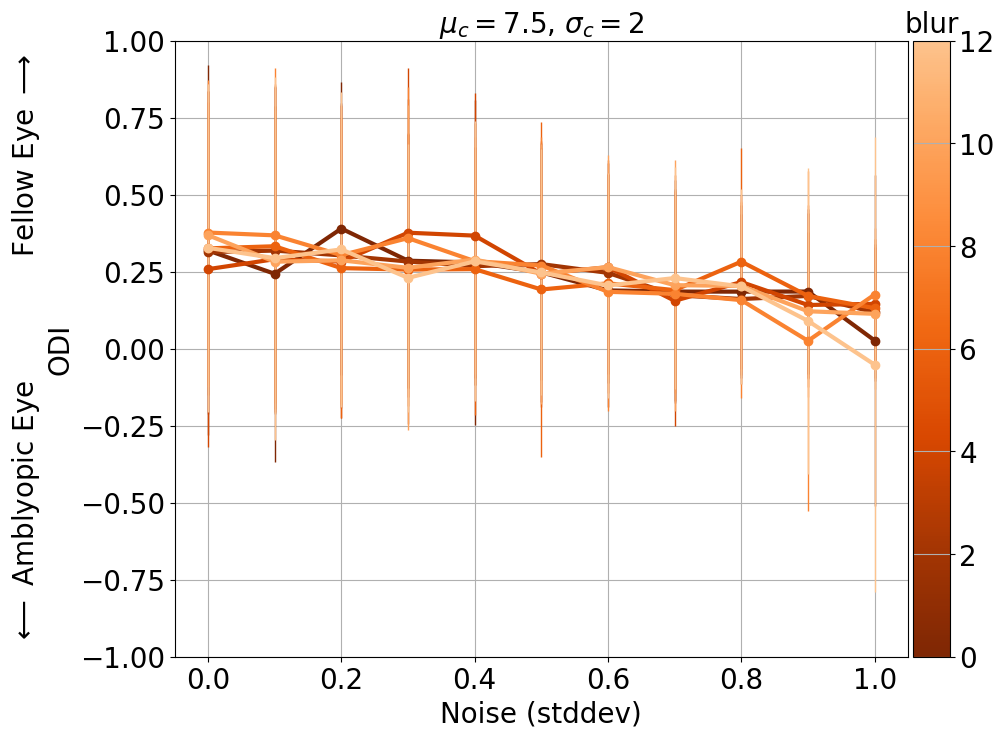

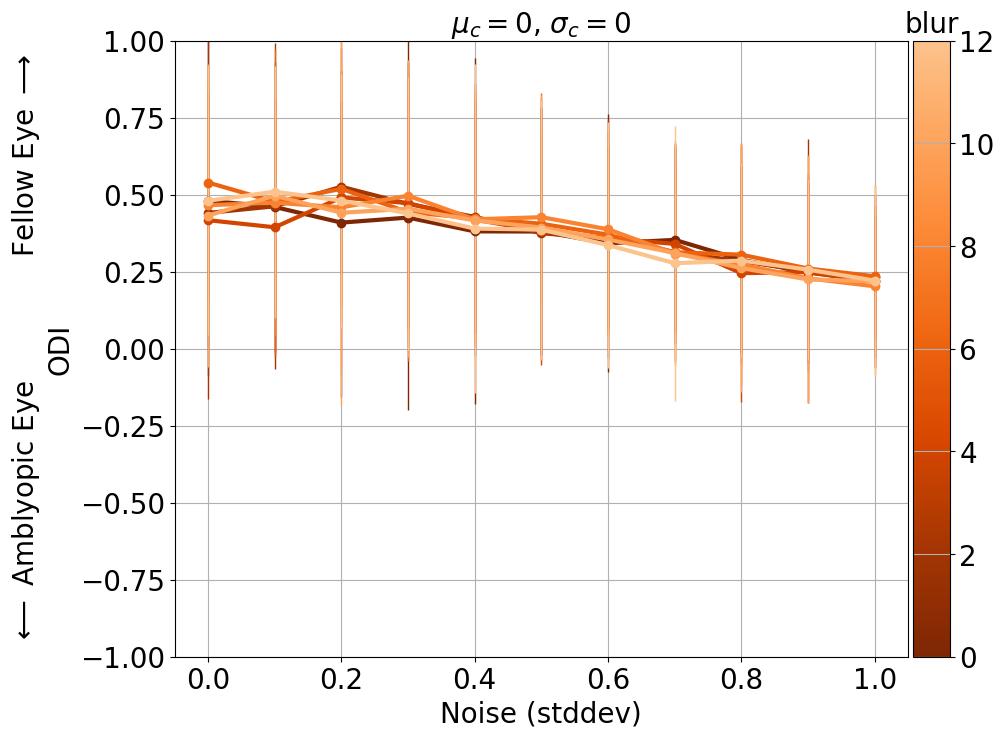

In [ ]:
figure()
μ_c=7.5
σ_c=2

v=np.flip(linspace(0.3,1,len(blur_mat)))
for blur_count,blur in enumerate(blur_mat):
    s=Storage()
    
    for noise_count,open_eye_noise in enumerate(noise_mat):

        p=[params for params in all_params if 
             (params.noise==open_eye_noise) & 
             (params.blur==blur) & 
             (params.mu_c==μ_c) & 
             (params.sigma_c==σ_c) 
            ]
        assert len(p)==1
        params=p[0]
        
        R=RR[params.sfname]
        
        noise=params.noise
        μ,σ=μσ(R.ODI[-1])

        s+=noise,μ,σ

    noise,μ,σ=s.arrays()
    errorbar(noise,μ,yerr=2*σ,marker='o',elinewidth=1,color=cm.Oranges(v[blur_count]))    
    xlabel('Noise (stddev)')
    ylabel(r'$\longleftarrow$ Amblyopic Eye              Fellow Eye $\longrightarrow$'+"\nODI")
    ylim([-1,1])
    title(f'$\mu_c={μ_c}$, $\sigma_c={σ_c}$')
        
divider = make_axes_locatable(plt.gca())
ax_cb2 = divider.new_horizontal(size="5%", pad=0.05)    
ax_cb2.grid(False)
cb2 = mpl.colorbar.ColorbarBase(ax_cb2, cmap=Oranges2,norm=mpl.colors.Normalize(vmin=blur_mat[0], vmax=blur_mat[-1]),orientation='vertical')
ax_cb2.grid(True)
plt.gcf().add_axes(ax_cb2)
title(r'blur')
        
    
    
figure()
μ_c=0
σ_c=0

v=np.flip(linspace(0.3,1,len(blur_mat)))
for blur_count,blur in enumerate(blur_mat):
    s=Storage()
    
    for noise_count,open_eye_noise in enumerate(noise_mat):

        p=[params for params in all_params if 
             (params.noise==open_eye_noise) & 
             (params.blur==blur) & 
             (params.mu_c==μ_c) & 
             (params.sigma_c==σ_c) 
            ]
        assert len(p)==1
        params=p[0]
        
        R=RR[params.sfname]
        
        noise=params.noise
        μ,σ=μσ(R.ODI[-1])

        s+=noise,μ,σ

    noise,μ,σ=s.arrays()
    errorbar(noise,μ,yerr=2*σ,marker='o',elinewidth=1,color=cm.Oranges(v[blur_count]))    
    xlabel('Noise (stddev)')
    ylabel(r'$\longleftarrow$ Amblyopic Eye              Fellow Eye $\longrightarrow$'+"\nODI")
    ylim([-1,1])
    title(f'$\mu_c={μ_c}$, $\sigma_c={σ_c}$')
        
divider = make_axes_locatable(plt.gca())
ax_cb2 = divider.new_horizontal(size="5%", pad=0.05)    
ax_cb2.grid(False)
cb2 = mpl.colorbar.ColorbarBase(ax_cb2, cmap=Oranges2,norm=mpl.colors.Normalize(vmin=blur_mat[0], vmax=blur_mat[-1]),orientation='vertical')
ax_cb2.grid(True)
plt.gcf().add_axes(ax_cb2)
title(r'blur')
            

## Patch

In [ ]:
noise_mat=linspace(0,1,11)

from collections import namedtuple

params = namedtuple('params', ['count', 'eta','noise','blur','number_of_neurons','sfname','mu_c','sigma_c'])
all_params=[]
count=0


for mu_c,sigma_c in zip(mu_c_mat,sigma_c_mat):
    for blur_count,blur in enumerate(blur_mat):
        for noise_count,closed_eye_noise in enumerate(noise_mat):
            all_params.append(params(count=count,
                         eta=eta,
                         noise=closed_eye_noise,
                             blur=blur,
                         number_of_neurons=number_of_neurons,
             sfname=f'{base}/patch {number_of_neurons} neurons {mu_c} mu_c {sigma_c} sigma_c {blur} blur {closed_eye_noise:.1f} noise.asdf',
                        mu_c=mu_c,sigma_c=sigma_c))

            count+=1

for a in all_params[:5]:
    print(a)
print("[....]")
for a in all_params[-5:]:
    print(a)



params(count=0, eta=1e-06, noise=0.0, blur=0, number_of_neurons=5, sfname='sims/2023-04-06/patch 5 neurons 0 mu_c 0 sigma_c 0 blur 0.0 noise.asdf', mu_c=0, sigma_c=0)
params(count=1, eta=1e-06, noise=0.1, blur=0, number_of_neurons=5, sfname='sims/2023-04-06/patch 5 neurons 0 mu_c 0 sigma_c 0 blur 0.1 noise.asdf', mu_c=0, sigma_c=0)
params(count=2, eta=1e-06, noise=0.2, blur=0, number_of_neurons=5, sfname='sims/2023-04-06/patch 5 neurons 0 mu_c 0 sigma_c 0 blur 0.2 noise.asdf', mu_c=0, sigma_c=0)
params(count=3, eta=1e-06, noise=0.30000000000000004, blur=0, number_of_neurons=5, sfname='sims/2023-04-06/patch 5 neurons 0 mu_c 0 sigma_c 0 blur 0.3 noise.asdf', mu_c=0, sigma_c=0)
params(count=4, eta=1e-06, noise=0.4, blur=0, number_of_neurons=5, sfname='sims/2023-04-06/patch 5 neurons 0 mu_c 0 sigma_c 0 blur 0.4 noise.asdf', mu_c=0, sigma_c=0)
[....]
params(count=149, eta=1e-06, noise=0.6000000000000001, blur=12, number_of_neurons=5, sfname='sims/2023-04-06/patch 5 neurons 7.5 mu_c 2 sigma_

In [ ]:
RR={}
for params in tqdm(all_params):
    RR[params.sfname]=Results(params.sfname)

  0%|          | 0/154 [00:00<?, ?it/s]

Text(0.5, 1.0, 'blur')

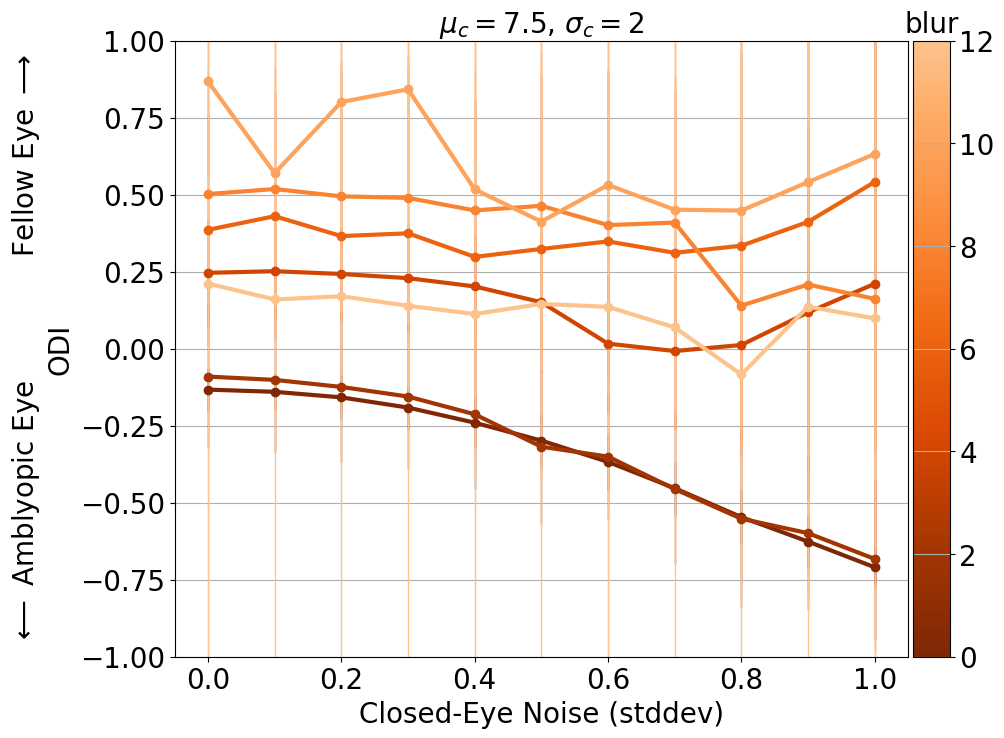

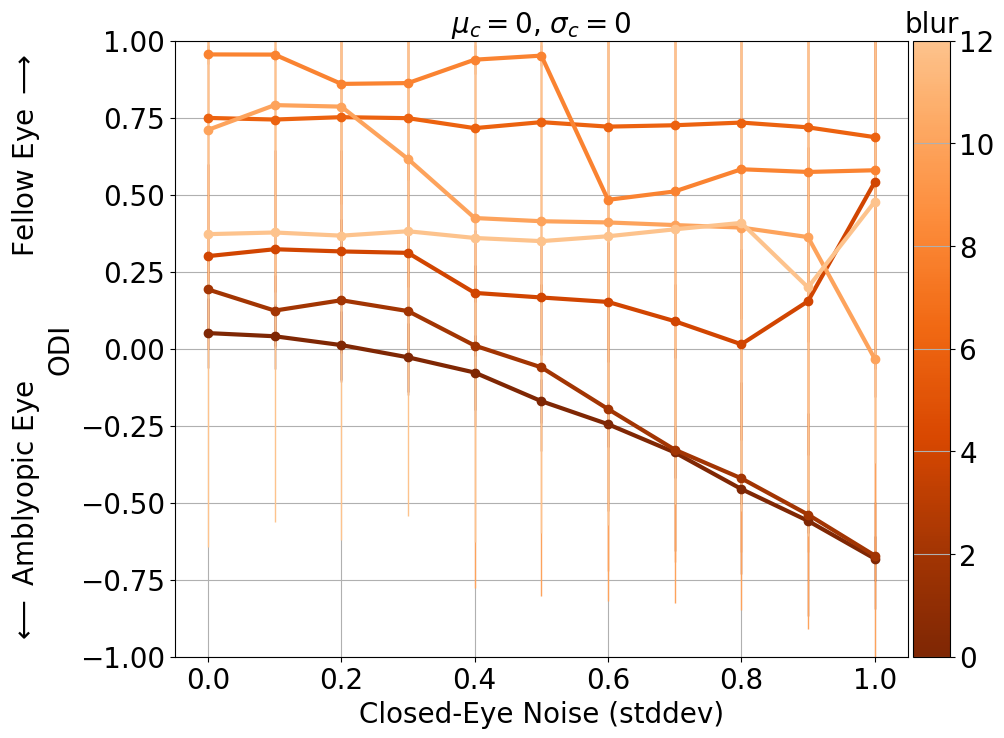

In [ ]:

figure()
μ_c=7.5
σ_c=2

v=np.flip(linspace(0.3,1,len(blur_mat)))
for blur_count,blur in enumerate(blur_mat):
    s=Storage()
    
    for noise_count,open_eye_noise in enumerate(noise_mat):

        p=[params for params in all_params if 
             (params.noise==open_eye_noise) & 
             (params.blur==blur) & 
             (params.mu_c==μ_c) & 
             (params.sigma_c==σ_c) 
            ]
        assert len(p)==1
        params=p[0]
        
        R=RR[params.sfname]
        
        noise=params.noise
        μ,σ=μσ(R.ODI[-1])

        s+=noise,μ,σ

    noise,μ,σ=s.arrays()
    errorbar(noise,μ,yerr=2*σ,marker='o',elinewidth=1,color=cm.Oranges(v[blur_count]))    
    xlabel('Closed-Eye Noise (stddev)')
    ylabel(r'$\longleftarrow$ Amblyopic Eye              Fellow Eye $\longrightarrow$'+"\nODI")
    ylim([-1,1])
    title(f'$\mu_c={μ_c}$, $\sigma_c={σ_c}$')
        
divider = make_axes_locatable(plt.gca())
ax_cb2 = divider.new_horizontal(size="5%", pad=0.05)    
ax_cb2.grid(False)
cb2 = mpl.colorbar.ColorbarBase(ax_cb2, cmap=Oranges2,norm=mpl.colors.Normalize(vmin=blur_mat[0], vmax=blur_mat[-1]),orientation='vertical')
ax_cb2.grid(True)
plt.gcf().add_axes(ax_cb2)
title(r'blur')
        
    
    

figure()
μ_c=0
σ_c=0

v=np.flip(linspace(0.3,1,len(blur_mat)))
for blur_count,blur in enumerate(blur_mat):
    s=Storage()
    
    for noise_count,open_eye_noise in enumerate(noise_mat):

        p=[params for params in all_params if 
             (params.noise==open_eye_noise) & 
             (params.blur==blur) & 
             (params.mu_c==μ_c) & 
             (params.sigma_c==σ_c) 
            ]
        assert len(p)==1
        params=p[0]
        
        R=RR[params.sfname]
        
        noise=params.noise
        μ,σ=μσ(R.ODI[-1])

        s+=noise,μ,σ

    noise,μ,σ=s.arrays()
    errorbar(noise,μ,yerr=2*σ,marker='o',elinewidth=1,color=cm.Oranges(v[blur_count]))    
    xlabel('Closed-Eye Noise (stddev)')
    ylabel(r'$\longleftarrow$ Amblyopic Eye              Fellow Eye $\longrightarrow$'+"\nODI")
    ylim([-1,1])
    title(f'$\mu_c={μ_c}$, $\sigma_c={σ_c}$')
        
divider = make_axes_locatable(plt.gca())
ax_cb2 = divider.new_horizontal(size="5%", pad=0.05)    
ax_cb2.grid(False)
cb2 = mpl.colorbar.ColorbarBase(ax_cb2, cmap=Oranges2,norm=mpl.colors.Normalize(vmin=blur_mat[0], vmax=blur_mat[-1]),orientation='vertical')
ax_cb2.grid(True)
plt.gcf().add_axes(ax_cb2)
title(r'blur')
            

## Atropine

In [ ]:
noise_mat=linspace(0,1,11)

from collections import namedtuple

params = namedtuple('params', ['count', 'eta','noise','blur','number_of_neurons','sfname','mu_c','sigma_c'])
all_params=[]
count=0


for mu_c,sigma_c in zip(mu_c_mat,sigma_c_mat):
    for blur_count,blur in enumerate(blur_mat):
        for noise_count,closed_eye_noise in enumerate(noise_mat):
            all_params.append(params(count=count,
                         eta=eta,
                         noise=closed_eye_noise,
                             blur=blur,
                         number_of_neurons=number_of_neurons,
             sfname=f'{base}/atropine {number_of_neurons} neurons {mu_c} mu_c {sigma_c} sigma_c {blur} blur {closed_eye_noise:.1f} noise.asdf',
                        mu_c=mu_c,sigma_c=sigma_c))

            count+=1

for a in all_params[:5]:
    print(a)
print("[....]")
for a in all_params[-5:]:
    print(a)



params(count=0, eta=1e-06, noise=0.0, blur=0, number_of_neurons=5, sfname='sims/2023-04-06/atropine 5 neurons 0 mu_c 0 sigma_c 0 blur 0.0 noise.asdf', mu_c=0, sigma_c=0)
params(count=1, eta=1e-06, noise=0.1, blur=0, number_of_neurons=5, sfname='sims/2023-04-06/atropine 5 neurons 0 mu_c 0 sigma_c 0 blur 0.1 noise.asdf', mu_c=0, sigma_c=0)
params(count=2, eta=1e-06, noise=0.2, blur=0, number_of_neurons=5, sfname='sims/2023-04-06/atropine 5 neurons 0 mu_c 0 sigma_c 0 blur 0.2 noise.asdf', mu_c=0, sigma_c=0)
params(count=3, eta=1e-06, noise=0.30000000000000004, blur=0, number_of_neurons=5, sfname='sims/2023-04-06/atropine 5 neurons 0 mu_c 0 sigma_c 0 blur 0.3 noise.asdf', mu_c=0, sigma_c=0)
params(count=4, eta=1e-06, noise=0.4, blur=0, number_of_neurons=5, sfname='sims/2023-04-06/atropine 5 neurons 0 mu_c 0 sigma_c 0 blur 0.4 noise.asdf', mu_c=0, sigma_c=0)
[....]
params(count=149, eta=1e-06, noise=0.6000000000000001, blur=12, number_of_neurons=5, sfname='sims/2023-04-06/atropine 5 neurons

In [ ]:
RR={}
for params in tqdm(all_params):
    RR[params.sfname]=Results(params.sfname)

  0%|          | 0/154 [00:00<?, ?it/s]

Text(0.5, 1.0, 'blur')

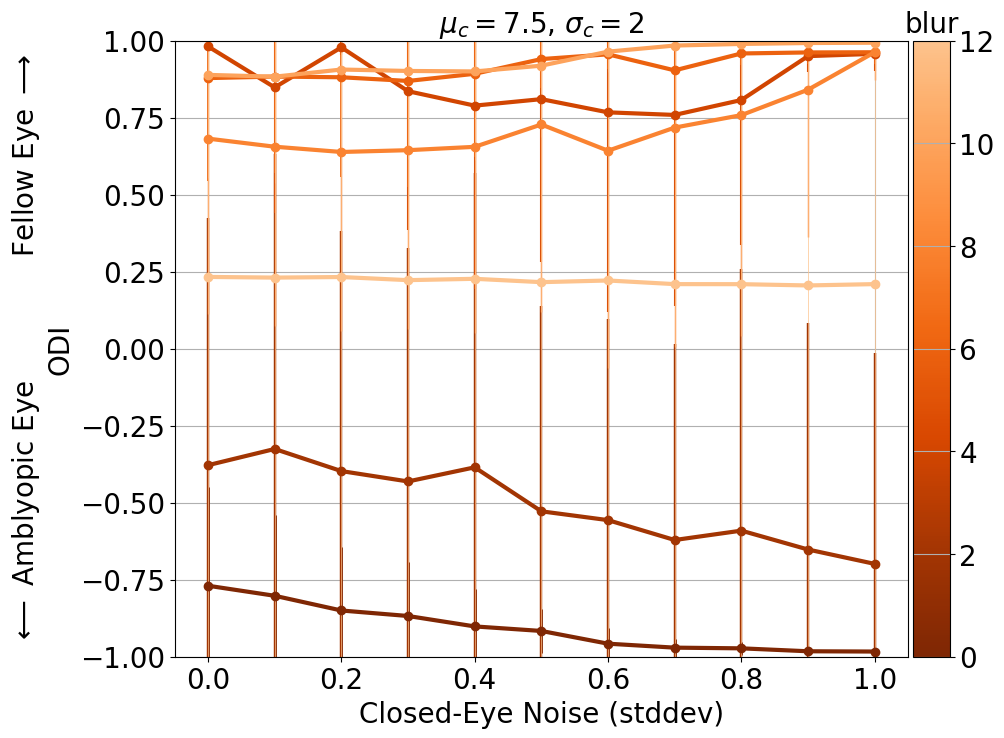

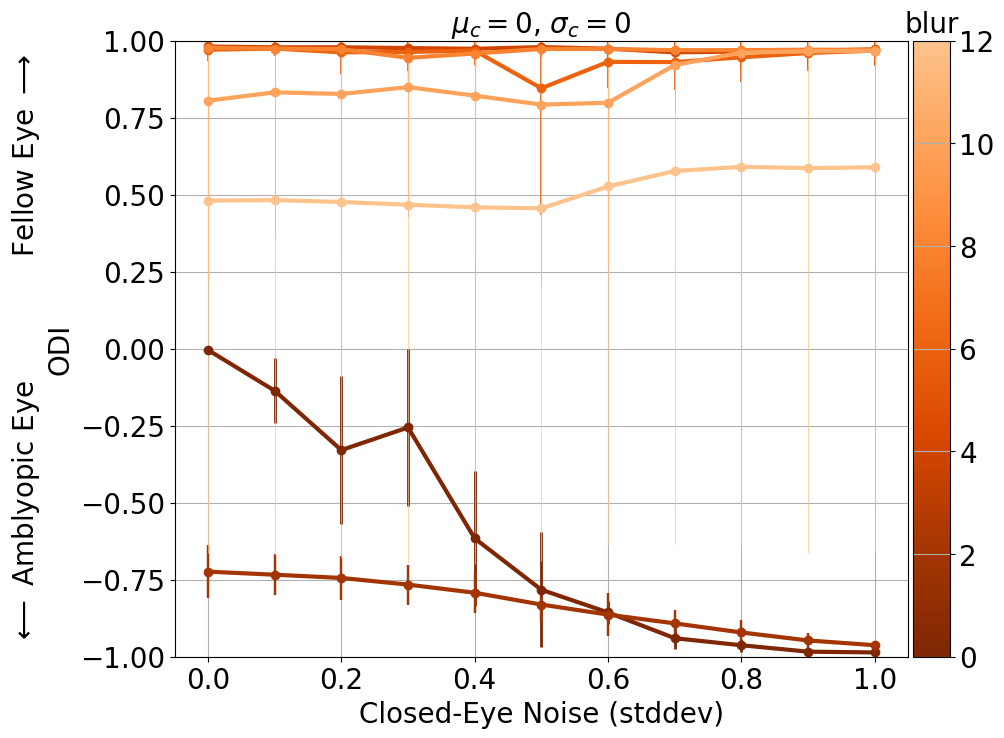

In [ ]:

figure()
μ_c=7.5
σ_c=2

ewidth=sorted(linspace(0.5,2,len(blur_mat)),reverse=True)

v=np.flip(linspace(0.3,1,len(blur_mat)))
for blur_count,blur in enumerate(blur_mat):
    s=Storage()
    
    for noise_count,open_eye_noise in enumerate(noise_mat):

        p=[params for params in all_params if 
             (params.noise==open_eye_noise) & 
             (params.blur==blur) & 
             (params.mu_c==μ_c) & 
             (params.sigma_c==σ_c) 
            ]
        assert len(p)==1
        params=p[0]
        
        R=RR[params.sfname]
        
        noise=params.noise
        μ,σ=μσ(R.ODI[-1])

        s+=noise,μ,σ

    noise,μ,σ=s.arrays()
    errorbar(noise,μ,yerr=2*σ,marker='o',elinewidth=ewidth[blur_count],color=cm.Oranges(v[blur_count]))    
    xlabel('Closed-Eye Noise (stddev)')
    ylabel(r'$\longleftarrow$ Amblyopic Eye              Fellow Eye $\longrightarrow$'+"\nODI")
    ylim([-1,1])
    title(f'$\mu_c={μ_c}$, $\sigma_c={σ_c}$')
        
divider = make_axes_locatable(plt.gca())
ax_cb2 = divider.new_horizontal(size="5%", pad=0.05)    
ax_cb2.grid(False)
cb2 = mpl.colorbar.ColorbarBase(ax_cb2, cmap=Oranges2,norm=mpl.colors.Normalize(vmin=blur_mat[0], vmax=blur_mat[-1]),orientation='vertical')
ax_cb2.grid(True)
plt.gcf().add_axes(ax_cb2)
title(r'blur')
        
    
    

figure()
μ_c=0
σ_c=0


v=np.flip(linspace(0.3,1,len(blur_mat)))
for blur_count,blur in enumerate(blur_mat):
    s=Storage()
    
    for noise_count,open_eye_noise in enumerate(noise_mat):

        p=[params for params in all_params if 
             (params.noise==open_eye_noise) & 
             (params.blur==blur) & 
             (params.mu_c==μ_c) & 
             (params.sigma_c==σ_c) 
            ]
        assert len(p)==1
        params=p[0]
        
        R=RR[params.sfname]
        
        noise=params.noise
        μ,σ=μσ(R.ODI[-1])

        s+=noise,μ,σ

    noise,μ,σ=s.arrays()
    errorbar(noise,μ,yerr=2*σ,marker='o',elinewidth=ewidth[blur_count],color=cm.Oranges(v[blur_count]))    
    xlabel('Closed-Eye Noise (stddev)')
    ylabel(r'$\longleftarrow$ Amblyopic Eye              Fellow Eye $\longrightarrow$'+"\nODI")
    ylim([-1,1])
    title(f'$\mu_c={μ_c}$, $\sigma_c={σ_c}$')
        
divider = make_axes_locatable(plt.gca())
ax_cb2 = divider.new_horizontal(size="5%", pad=0.05)    
ax_cb2.grid(False)
cb2 = mpl.colorbar.ColorbarBase(ax_cb2, cmap=Oranges2,norm=mpl.colors.Normalize(vmin=blur_mat[0], vmax=blur_mat[-1]),orientation='vertical')
ax_cb2.grid(True)
plt.gcf().add_axes(ax_cb2)
title(r'blur')
            

Text(0.5, 1.0, 'blur')

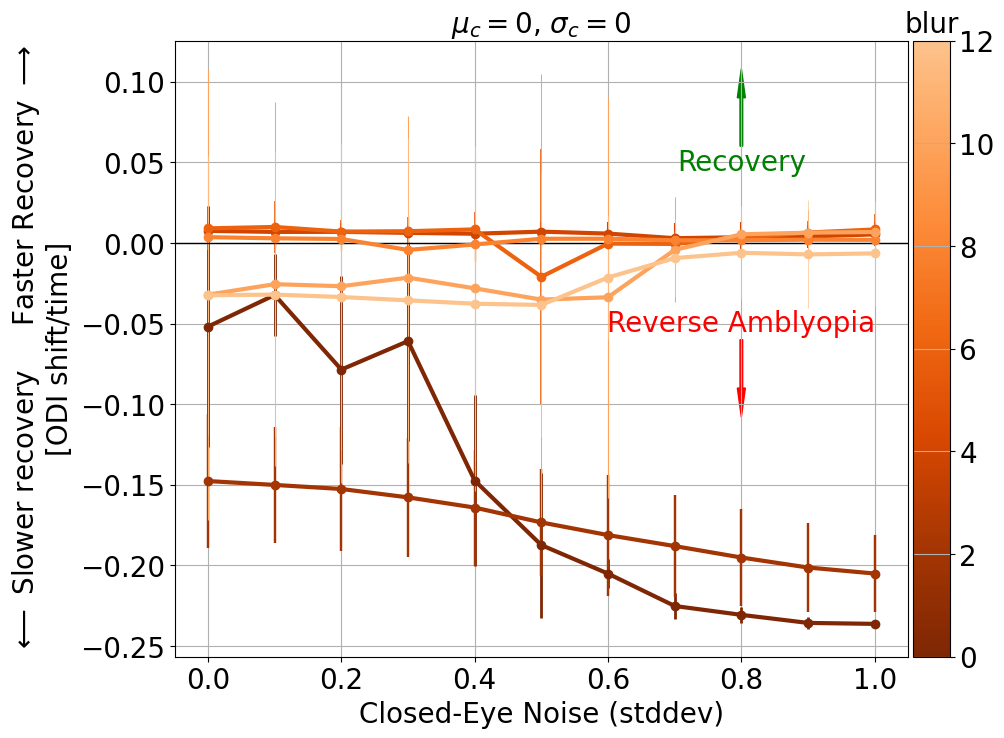

In [ ]:
v=np.flip(linspace(0.3,1,len(blur_mat)))
for blur_count,blur in enumerate(blur_mat):
    s=Storage()
    
    for noise_count,open_eye_noise in enumerate(noise_mat):

        p=[params for params in all_params if 
             (params.noise==open_eye_noise) & 
             (params.blur==blur) & 
             (params.mu_c==μ_c) & 
             (params.sigma_c==σ_c) 
            ]
        assert len(p)==1
        params=p[0]
        
        R=RR[params.sfname]
        
        noise=params.noise
        
        idx1,idx2=R.sequence_index[0]

        t=R.t/day
        recovery_rate_μ,recovery_rate_σ=μσ((R.ODI[idx2,:]-R.ODI[idx1,:])/(t[idx2]-t[idx1]))  

        s+=noise,recovery_rate_μ,recovery_rate_σ 
        

    noise,recovery_rate_μ,recovery_rate_σ =s.arrays()
    errorbar(noise,recovery_rate_μ,yerr=2*recovery_rate_σ,marker='o',elinewidth=ewidth[blur_count],color=cm.Oranges(v[blur_count]))    
    xlabel('Closed-Eye Noise (stddev)')
    ylabel(r'$\longleftarrow$ Slower recovery     Faster Recovery $\longrightarrow$'+"\n[ODI shift/time]")

    title(f'$\mu_c={μ_c}$, $\sigma_c={σ_c}$')
        
text(0.8,0.05,'Recovery',ha='center',va='center',color='green')
text(0.8,-0.05,'Reverse Amblyopia',ha='center',va='center',color='red')
arrow(0.8,-.06,0,-.03,width=0.004,color='red')
arrow(0.8,.06,0,.03,width=0.004,color='green')

        
xl=gca().get_xlim()
plot(xl,[0,0],'k-',lw=1)
gca().set_xlim(xl)
        
    
    
        
divider = make_axes_locatable(plt.gca())
ax_cb2 = divider.new_horizontal(size="5%", pad=0.05)    
ax_cb2.grid(False)
cb2 = mpl.colorbar.ColorbarBase(ax_cb2, cmap=Oranges2,norm=mpl.colors.Normalize(vmin=blur_mat[0], vmax=blur_mat[-1]),orientation='vertical')
ax_cb2.grid(True)
plt.gcf().add_axes(ax_cb2)
title(r'blur')
            
    
    

## Contrast Mask

In [ ]:
contrast_mat=linspace(0,1,6)  # linspace(0,1,11)
mask_mat=array([0,1])
f_mat=array([10,30,50,70,90])

from collections import namedtuple


params = namedtuple('params', ['count', 'eta','blur','contrast','f','mask','number_of_neurons','sfname','mu_c','sigma_c'])
all_params=[]
count=0


for mu_c,sigma_c in zip(mu_c_mat,sigma_c_mat):
    for blur_count,blur in enumerate(blur_mat):  # only the deficit
        for contrast_count,contrast in enumerate(contrast_mat):
            for mask in [0,1]:
                if mask:
                    for fc,f in enumerate(f_mat):
                        all_params.append(params(count=count,
                                     eta=eta,
                                         blur=blur,
                                                 contrast=contrast,
                                                 f=f,
                                                 mask=mask,
                                     number_of_neurons=number_of_neurons,
                         sfname=f'{base}/contrast mask {number_of_neurons} neurons {mu_c} mu_c {sigma_c} sigma_c {blur} blur {contrast:.1f} contrast {mask} mask {f} f.asdf',
                                    mu_c=mu_c,sigma_c=sigma_c))

                else:
                    f=10
                    all_params.append(params(count=count,
                                 eta=eta,
                                     blur=blur,
                                             contrast=contrast,
                                             f=f,
                                             mask=mask,
                                 number_of_neurons=number_of_neurons,
                     sfname=f'{base}/contrast mask {number_of_neurons} neurons {mu_c} mu_c {sigma_c} sigma_c {blur} blur {contrast:.1f} contrast {mask} mask {f} f.asdf',
                                mu_c=mu_c,sigma_c=sigma_c))
                    
                        
                count+=1
                    

for a in all_params[:5]:
    print(a)
print("[....]")
for a in all_params[-5:]:
    print(a)



params(count=0, eta=1e-06, blur=0, contrast=0.0, f=10, mask=0, number_of_neurons=5, sfname='sims/2023-04-06/contrast mask 5 neurons 0 mu_c 0 sigma_c 0 blur 0.0 contrast 0 mask 10 f.asdf', mu_c=0, sigma_c=0)
params(count=1, eta=1e-06, blur=0, contrast=0.0, f=10, mask=1, number_of_neurons=5, sfname='sims/2023-04-06/contrast mask 5 neurons 0 mu_c 0 sigma_c 0 blur 0.0 contrast 1 mask 10 f.asdf', mu_c=0, sigma_c=0)
params(count=1, eta=1e-06, blur=0, contrast=0.0, f=30, mask=1, number_of_neurons=5, sfname='sims/2023-04-06/contrast mask 5 neurons 0 mu_c 0 sigma_c 0 blur 0.0 contrast 1 mask 30 f.asdf', mu_c=0, sigma_c=0)
params(count=1, eta=1e-06, blur=0, contrast=0.0, f=50, mask=1, number_of_neurons=5, sfname='sims/2023-04-06/contrast mask 5 neurons 0 mu_c 0 sigma_c 0 blur 0.0 contrast 1 mask 50 f.asdf', mu_c=0, sigma_c=0)
params(count=1, eta=1e-06, blur=0, contrast=0.0, f=70, mask=1, number_of_neurons=5, sfname='sims/2023-04-06/contrast mask 5 neurons 0 mu_c 0 sigma_c 0 blur 0.0 contrast 1 m

In [ ]:
RR={}
for params in tqdm(all_params):
    RR[params.sfname]=Results(params.sfname)

  0%|          | 0/504 [00:00<?, ?it/s]

Text(0.5, 1.0, 'blur')

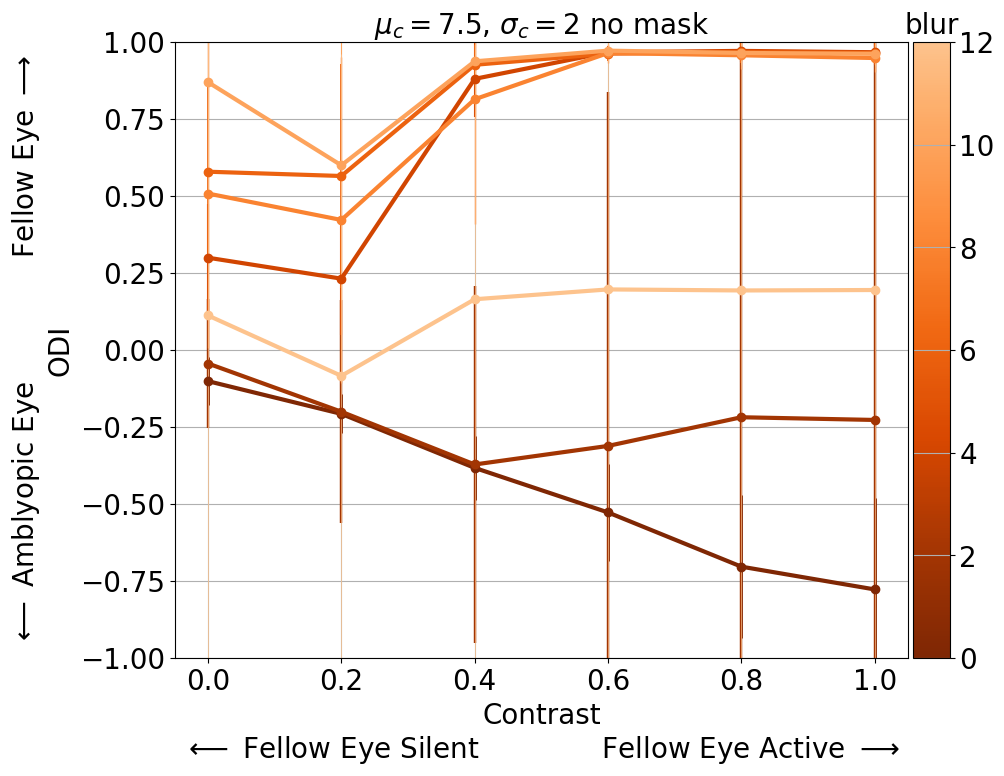

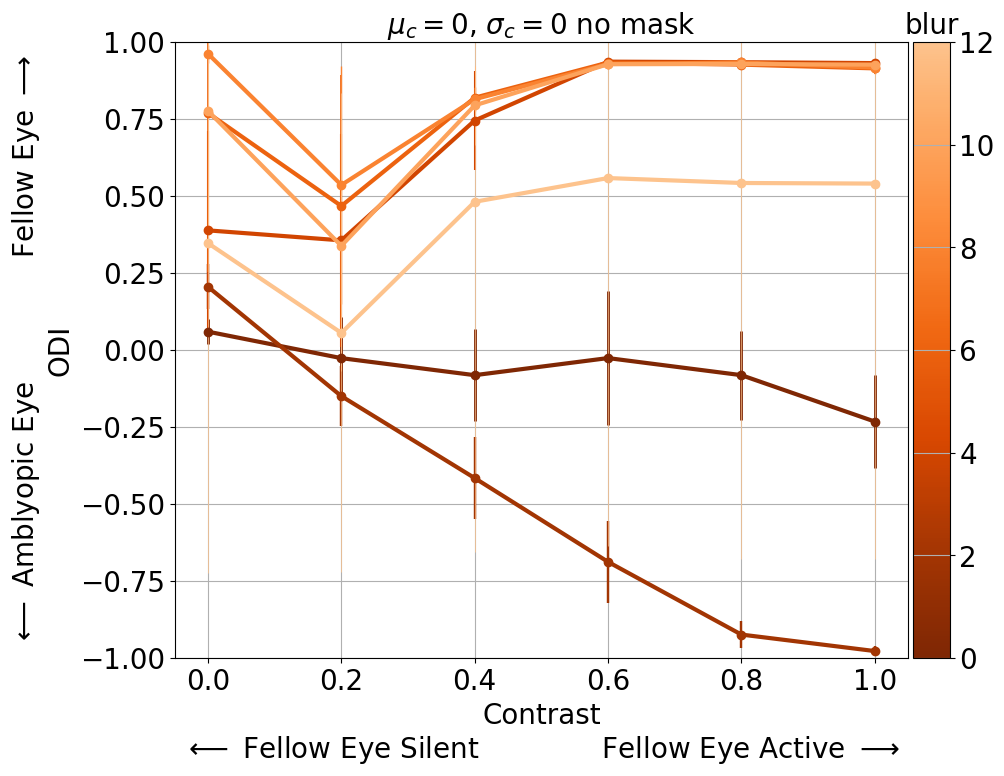

In [ ]:

figure()
μ_c=7.5
σ_c=2

ewidth=sorted(linspace(0.5,2,len(blur_mat)),reverse=True)

v=np.flip(linspace(0.3,1,len(blur_mat)))
for blur_count,blur in enumerate(blur_mat):
    s=Storage()
    
    for contrast_count,contrast in enumerate(contrast_mat):

        p=[params for params in all_params if 
             (params.contrast==contrast) & 
             (params.blur==blur) & 
             (params.mask==0) &
             (params.mu_c==μ_c) & 
             (params.sigma_c==σ_c) 
            ]
        assert len(p)==1
        params=p[0]
        
        R=RR[params.sfname]
        
        contrast=params.contrast
        μ,σ=μσ(R.ODI[-1])

        s+=contrast,μ,σ

    contrast,μ,σ=s.arrays()
    errorbar(contrast,μ,yerr=2*σ,marker='o',elinewidth=ewidth[blur_count],color=cm.Oranges(v[blur_count]))    
    xlabel('Contrast\n'+r'$\longleftarrow$ Fellow Eye Silent              Fellow Eye Active $\longrightarrow$')
    ylabel(r'$\longleftarrow$ Amblyopic Eye              Fellow Eye $\longrightarrow$'+"\nODI")
    ylim([-1,1])
    title(f'$\mu_c={μ_c}$, $\sigma_c={σ_c}$ no mask')
        
divider = make_axes_locatable(plt.gca())
ax_cb2 = divider.new_horizontal(size="5%", pad=0.05)    
ax_cb2.grid(False)
cb2 = mpl.colorbar.ColorbarBase(ax_cb2, cmap=Oranges2,norm=mpl.colors.Normalize(vmin=blur_mat[0], vmax=blur_mat[-1]),orientation='vertical')
ax_cb2.grid(True)
plt.gcf().add_axes(ax_cb2)
title(r'blur')
        
    

figure()
μ_c=0
σ_c=0

ewidth=sorted(linspace(0.5,2,len(blur_mat)),reverse=True)

v=np.flip(linspace(0.3,1,len(blur_mat)))
for blur_count,blur in enumerate(blur_mat):
    s=Storage()
    
    for contrast_count,contrast in enumerate(contrast_mat):

        p=[params for params in all_params if 
             (params.contrast==contrast) & 
             (params.blur==blur) & 
             (params.mask==0) &
             (params.mu_c==μ_c) & 
             (params.sigma_c==σ_c) 
            ]
        assert len(p)==1
        params=p[0]
        
        R=RR[params.sfname]
        
        contrast=params.contrast
        μ,σ=μσ(R.ODI[-1])

        s+=contrast,μ,σ

    contrast,μ,σ=s.arrays()
    errorbar(contrast,μ,yerr=2*σ,marker='o',elinewidth=ewidth[blur_count],color=cm.Oranges(v[blur_count]))    
    xlabel('Contrast\n'+r'$\longleftarrow$ Fellow Eye Silent              Fellow Eye Active $\longrightarrow$')
    ylabel(r'$\longleftarrow$ Amblyopic Eye              Fellow Eye $\longrightarrow$'+"\nODI")
    ylim([-1,1])
    title(f'$\mu_c={μ_c}$, $\sigma_c={σ_c}$ no mask')
        
divider = make_axes_locatable(plt.gca())
ax_cb2 = divider.new_horizontal(size="5%", pad=0.05)    
ax_cb2.grid(False)
cb2 = mpl.colorbar.ColorbarBase(ax_cb2, cmap=Oranges2,norm=mpl.colors.Normalize(vmin=blur_mat[0], vmax=blur_mat[-1]),orientation='vertical')
ax_cb2.grid(True)
plt.gcf().add_axes(ax_cb2)
title(r'blur')
        
    
    
    


Text(0.5, 1.0, 'no\nmask\nblur')

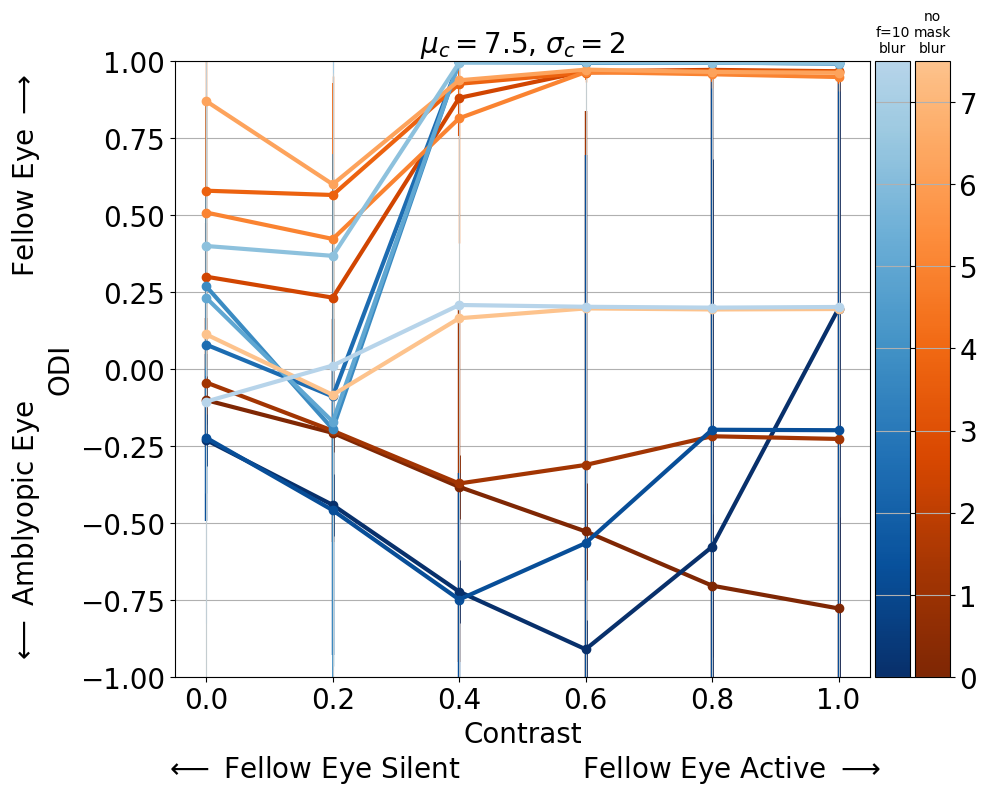

In [ ]:

figure()
μ_c=7.5
σ_c=2

ewidth=sorted(linspace(0.5,2,len(blur_mat)),reverse=True)

v=np.flip(linspace(0.3,1,len(blur_mat)))
for blur_count,blur in enumerate(blur_mat):
    s=Storage()
    
    for contrast_count,contrast in enumerate(contrast_mat):

        p=[params for params in all_params if 
             (params.contrast==contrast) & 
             (params.blur==blur) & 
             (params.mask==0) &
             (params.mu_c==μ_c) & 
             (params.sigma_c==σ_c) 
            ]
        assert len(p)==1
        params=p[0]
        
        R=RR[params.sfname]
        
        contrast=params.contrast
        μ,σ=μσ(R.ODI[-1])

        s+=contrast,μ,σ

    contrast,μ,σ=s.arrays()
    errorbar(contrast,μ,yerr=2*σ,marker='o',elinewidth=ewidth[blur_count],color=cm.Oranges(v[blur_count]))    
    
    ### 
    f=10
    s=Storage()
    
    for contrast_count,contrast in enumerate(contrast_mat):

        p=[params for params in all_params if 
             (params.contrast==contrast) & 
             (params.blur==blur) & 
             (params.mask==1) &
             (params.f==f) &
             (params.mu_c==μ_c) & 
             (params.sigma_c==σ_c) 
            ]
        assert len(p)==1
        params=p[0]
        
        R=RR[params.sfname]
        
        contrast=params.contrast
        μ,σ=μσ(R.ODI[-1])

        s+=contrast,μ,σ

    contrast,μ,σ=s.arrays()
    errorbar(contrast,μ,yerr=2*σ,marker='o',elinewidth=ewidth[blur_count],color=cm.Blues(v[blur_count]))    
    
    
    
    
xlabel('Contrast\n'+r'$\longleftarrow$ Fellow Eye Silent              Fellow Eye Active $\longrightarrow$')
ylabel(r'$\longleftarrow$ Amblyopic Eye              Fellow Eye $\longrightarrow$'+"\nODI")
ylim([-1,1])
title(f'$\mu_c={μ_c}$, $\sigma_c={σ_c}$')
        
    
    
    
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)   
ax_cb.grid(False)
ax_cb2 = divider.new_horizontal(size="5%", pad=0.05)    
ax_cb2.grid(False)
cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=Blues2,norm=mpl.colors.Normalize(vmin=mu_c_mat[0], vmax=mu_c_mat[-1]),orientation='vertical')
cb2 = mpl.colorbar.ColorbarBase(ax_cb2, cmap=Oranges2,norm=mpl.colors.Normalize(vmin=mu_c_mat[0], vmax=mu_c_mat[-1]),orientation='vertical')
plt.gcf().add_axes(ax_cb)
ax_cb.grid(True)
ax_cb.set_yticklabels([])
ax_cb2.grid(True)
title(f'f={f}\nblur',size=10)
plt.gcf().add_axes(ax_cb2)
title('no\nmask\nblur',size=10)



Text(0.5, 1.0, 'no\nmask\nblur')

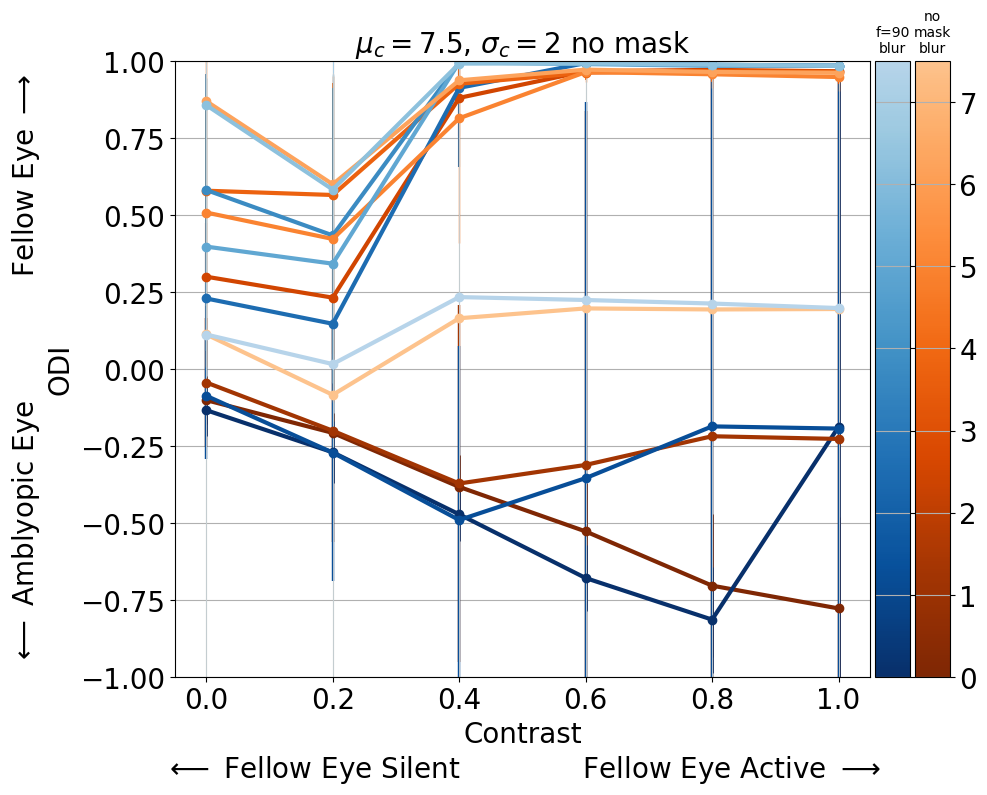

In [ ]:

figure()
μ_c=7.5
σ_c=2

ewidth=sorted(linspace(0.5,2,len(blur_mat)),reverse=True)

v=np.flip(linspace(0.3,1,len(blur_mat)))
for blur_count,blur in enumerate(blur_mat):
    s=Storage()
    
    for contrast_count,contrast in enumerate(contrast_mat):

        p=[params for params in all_params if 
             (params.contrast==contrast) & 
             (params.blur==blur) & 
             (params.mask==0) &
             (params.mu_c==μ_c) & 
             (params.sigma_c==σ_c) 
            ]
        assert len(p)==1
        params=p[0]
        
        R=RR[params.sfname]
        
        contrast=params.contrast
        μ,σ=μσ(R.ODI[-1])

        s+=contrast,μ,σ

    contrast,μ,σ=s.arrays()
    errorbar(contrast,μ,yerr=2*σ,marker='o',elinewidth=ewidth[blur_count],color=cm.Oranges(v[blur_count]))    
    
    ### 
    f=90
    s=Storage()
    
    for contrast_count,contrast in enumerate(contrast_mat):

        p=[params for params in all_params if 
             (params.contrast==contrast) & 
             (params.blur==blur) & 
             (params.mask==1) &
             (params.f==f) &
             (params.mu_c==μ_c) & 
             (params.sigma_c==σ_c) 
            ]
        assert len(p)==1
        params=p[0]
        
        R=RR[params.sfname]
        
        contrast=params.contrast
        μ,σ=μσ(R.ODI[-1])

        s+=contrast,μ,σ

    contrast,μ,σ=s.arrays()
    errorbar(contrast,μ,yerr=2*σ,marker='o',elinewidth=ewidth[blur_count],color=cm.Blues(v[blur_count]))    
    
    
    
    
xlabel('Contrast\n'+r'$\longleftarrow$ Fellow Eye Silent              Fellow Eye Active $\longrightarrow$')
ylabel(r'$\longleftarrow$ Amblyopic Eye              Fellow Eye $\longrightarrow$'+"\nODI")
ylim([-1,1])
title(f'$\mu_c={μ_c}$, $\sigma_c={σ_c}$ no mask')
        
    
    
    
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)   
ax_cb.grid(False)
ax_cb2 = divider.new_horizontal(size="5%", pad=0.05)    
ax_cb2.grid(False)
cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=Blues2,norm=mpl.colors.Normalize(vmin=mu_c_mat[0], vmax=mu_c_mat[-1]),orientation='vertical')
cb2 = mpl.colorbar.ColorbarBase(ax_cb2, cmap=Oranges2,norm=mpl.colors.Normalize(vmin=mu_c_mat[0], vmax=mu_c_mat[-1]),orientation='vertical')
plt.gcf().add_axes(ax_cb)
ax_cb.grid(True)
ax_cb.set_yticklabels([])
ax_cb2.grid(True)
title(f'f={f}\nblur',size=10)
plt.gcf().add_axes(ax_cb2)
title('no\nmask\nblur',size=10)

